# Experimenting with tensorflow: Simple sessions and training a classifier

In this short notebook, we explore few features of tensorflow (powerful python library for machine learning). We first look at few introductory examples and finish by building a linear regression classifier

## Evaluating shapes and ranks using Tensorflow:

We build a graph and run a session that identifies the rank and shape of tf.constants

In [7]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

g=tf.Graph()
with g.as_default():
    #define 3 tensors:
    x1=tf.constant(np.pi)
    x2=tf.constant([1,2,3,4])
    x3=tf.constant([[1,2],[3,4]])
    #rank:
    r1=tf.rank(x1)
    r2=tf.rank(x2)
    r3=tf.rank(x3)
    #get shape
    s1=x1.get_shape()
    s2=x2.get_shape()
    s3=x3.get_shape()
    print("shapes of x1,x2,x3 are: ",s1,s2,s3)

with tf.Session(graph=g):
    print('rank of r1, r2 and r3 are: ',r1.eval(),r2.eval(),r3.eval())



shapes of x1,x2,x3 are:  () (4,) (2, 2)
rank of r1, r2 and r3 are:  0 1 2


## Evaluating a simple function using Tensorflow:

We build a graph and run a session that evaluates a simple equation 2*(a-b)+c

In [8]:
#2*(a-b)+c
g=tf.Graph()
with g.as_default():
    a=tf.constant(1,name='a')
    b=tf.constant(2,name='b')
    c=tf.constant(3,name='c')
    z=2*(a-b)+c

with tf.Session(graph=g) as sess:
    
    print('z=2*(a-b)+c=',2,"*",'(',sess.run(a),'-',sess.run(b),')+',sess.run(c),"=",sess.run(z))

#do the same thinng using placeholderf and intermediate nodes

g=tf.Graph()
with g.as_default():
    a=tf.placeholder(dtype=tf.int32,shape=[],name='tf_a')
    b=tf.placeholder(dtype=tf.int32,shape=[],name='tf_b')
    c=tf.placeholder(dtype=tf.int32,shape=[],name='tf_c')
    r1=(a-b)
    r2=2*r1
    z=r2+c

with tf.Session(graph=g) as sess:
    x=1
    y=2
    w=3
    print('Evaluating our function')
    print("z=",sess.run(z,feed_dict={a:x,b:y,c:w}))

#try mean with different sizes of variables

g=tf.Graph()
with g.as_default():
    x=tf.placeholder(tf.float32,shape=[None,2],name='x')
    x_mean=tf.reduce_mean(x,axis=[0],name='mean')

with tf.Session(graph=g) as sess:
    np.random.seed(seed=123)
    np.set_printoptions(precision=2)
    x1=np.random.uniform(low=0.0,high=1.0,size=[5,2])
    x2=np.random.uniform(low=0.0,high=1.0,size=[10,2])
    print("mean x1:",sess.run(x_mean,feed_dict={x:x1}))
    print("mean x2:",sess.run(x_mean,feed_dict={x:x2}))
    



z=2*(a-b)+c= 2 * ( 1 - 2 )+ 3 = 1
Evaluating our function
z= 1
mean x1: [0.62 0.47]
mean x2: [0.46 0.49]


## Building a classifier using Tensorflow
We construct a dataset using Tensorflow. We then construct a linear regression models thatd fits a line through data and minimizes mse
We evaluate and print the loss function every 50 epochs, and we also plot useful graph presenting our regression findings

<tf.Variable 'net_A/layer-1/w1:0' shape=(10, 4) dtype=float32_ref>
<tf.Variable 'net_A/layer-2/w2:0' shape=(20, 10) dtype=float32_ref>
<tf.Variable 'net_B/Variable:0' shape=(15, 4) dtype=float32_ref>


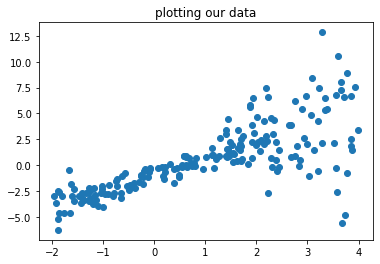

evaluating our loss function every 50 epochs
epoch  0 : 5.1510205
epoch  50 : 4.954921
epoch  100 : 4.8234315
epoch  150 : 4.727279
epoch  200 : 4.652324
epoch  250 : 4.591417
epoch  300 : 4.5406847
epoch  350 : 4.4978347
epoch  400 : 4.461364
epoch  450 : 4.4301934


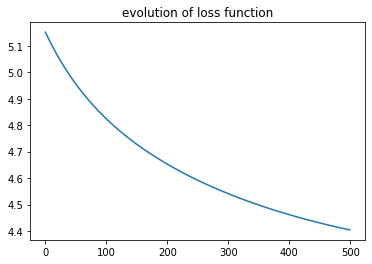

INFO:tensorflow:Restoring parameters from ./trained-model
INFO:tensorflow:Restoring parameters from ./trained-model


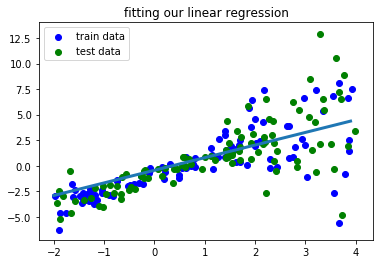

In [17]:
#variable scope

g=tf.Graph()
with g.as_default():
    with tf.variable_scope('net_A'):
        with tf.variable_scope('layer-1'):
            w1=tf.Variable(tf.random_normal(shape=(10,4)),name='w1')
        with tf.variable_scope('layer-2'):
            w2=tf.Variable(tf.random_normal(shape=(20,10)),name='w2')
            
    
    with tf.variable_scope('net_B'):
        w3=tf.Variable(tf.Variable(tf.random_normal(shape=(15,4)),name='w3'))

print(w1)
print(w2)
print(w3)


#getting some complicated stuff done
#build a classifier
#lets implement a linear regression:

g=tf.Graph()
with g.as_default():
    x_tf=tf.placeholder(dtype=tf.float32,shape=(None),name="x_tf")
    y_tf=tf.placeholder(dtype=tf.float32,shape=(None),name="y_tf")
    w_tf=tf.Variable(tf.random_normal(shape=(1,1)),name='w_tf')
    bias_tf=tf.Variable(tf.zeros(shape=(1,1)),name='bias')
    y_hat=tf.add(w_tf*x_tf,bias_tf,name='y_hat')
    msq_mean=tf.reduce_mean(tf.square(y_hat-y_tf))
    #train model
    optim=tf.train.GradientDescentOptimizer(learning_rate=0.001)
    tr_op=optim.minimize(msq_mean,name='train_op')
    saver=tf.train.Saver()

import matplotlib.pyplot as plt
np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=4, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0,scale=(0.5 + t*t/3),size=None)
        y.append(r)
    return x, 1.726*x -0.84 + np.array(y)

x, y = make_random_data()
plt.plot(x, y, 'o')
plt.title('plotting our data')
#plt.legend()
plt.show()

x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

costt=[]
print('evaluating our loss function every 50 epochs')
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    for epochs in range(500):
        _,cost=sess.run([tr_op,msq_mean],feed_dict={x_tf:x_train,y_tf:y_train})
        costt.append(cost)
        if np.remainder(epochs,50)==0:
            print("epoch ",epochs,":",cost)
    saver.save(sess, './trained-model')

plt.plot(costt)
plt.title('evolution of loss function')
#plt.legend()
plt.show()

g2=tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver=tf.train.import_meta_graph('./trained-model.meta')
    new_saver.restore(sess,'./trained-model')
    y_pred=sess.run('y_hat:0',feed_dict={'x_tf:0':x_test})

x_arr = np.arange(-2, 4, 0.1)
g3=tf.Graph()
with tf.Session(graph=g3) as sess:
    new_saver=tf.train.import_meta_graph('./trained-model.meta')
    new_saver.restore(sess,'./trained-model')
    y_arr=sess.run('y_hat:0',feed_dict={'x_tf:0':x_arr})
    

plt.scatter(x_train,y_train,c='blue',marker='o',label='train data')
plt.scatter(x_test,y_test,c='green',marker='o',label='test data')
plt.plot(x_arr,y_arr.T[:,0],linewidth=3)
plt.title('fitting our linear regression')
plt.legend()
plt.show()
#print(y_arr)
